### Building MLP for classifying flowers in Iris Dataset

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

iris = load_iris()

In [19]:
import torch
from torch.utils.data import TensorDataset, DataLoader

X = iris['data']
y = iris['target']

X_train, X_test, `, y_test = train_test_split(X, y, test_size=1./3, random_state=1)

X_train_norm = (X_train - np.mean(X_train))/np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)


train_ds = TensorDataset(X_train_norm, y_train)
torch.manual_seed(1)

batch_size = 2 

train_dl = DataLoader(train_ds, batch_size, shuffle=True)

y_train

tensor([0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 2, 0,
        1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 1, 2, 2, 1, 2,
        2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 2, 0, 2,
        0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2,
        2, 1, 2, 0])

In [16]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)
        return x
    
input_size = X_train_norm.shape[1]
hidden_size=16
output_size=3

model = Model(input_size, hidden_size, output_size)

learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [22]:
num_epochs = 100
loss_hist = [0]*num_epochs
accuracy_hist = [0]*num_epochs

for epoch in range(num_epochs):
    for x_batch,y_batch in train_dl:
        
        # Generate predictions
        pred = model(x_batch)
        print(pred)
        
        print(y_batch)
        
        # Calculate Loss
        loss = loss_fn(pred, y_batch)
        
        # compute gradeints
        loss.backward()
        
        # update weights & gradients
        optimizer.step()
        
        # Reset gradients to zero for next epoch
        optimizer.zero_grad()
        print(torch.argmax(pred, dim=1))
        
        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.mean()
        
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)


tensor([[6.9310e-05, 8.2989e-01, 1.7004e-01],
        [2.7408e-04, 9.3473e-01, 6.4993e-02]], grad_fn=<SoftmaxBackward0>)
tensor([1, 1])
tensor([1, 1])
tensor([[4.3130e-08, 1.2716e-02, 9.8728e-01],
        [9.9753e-01, 2.4748e-03, 3.0928e-08]], grad_fn=<SoftmaxBackward0>)
tensor([2, 0])
tensor([2, 0])
tensor([[9.9675e-01, 3.2544e-03, 4.5402e-08],
        [1.7025e-02, 9.8270e-01, 2.7454e-04]], grad_fn=<SoftmaxBackward0>)
tensor([0, 1])
tensor([0, 1])
tensor([[6.2098e-04, 9.8972e-01, 9.6609e-03],
        [9.9790e-01, 2.0959e-03, 2.5048e-08]], grad_fn=<SoftmaxBackward0>)
tensor([1, 0])
tensor([1, 0])
tensor([[9.9758e-01, 2.4186e-03, 3.2230e-08],
        [9.9707e-01, 2.9349e-03, 3.7529e-08]], grad_fn=<SoftmaxBackward0>)
tensor([0, 0])
tensor([0, 0])
tensor([[9.9809e-01, 1.9145e-03, 2.2783e-08],
        [4.8356e-09, 3.6047e-03, 9.9640e-01]], grad_fn=<SoftmaxBackward0>)
tensor([0, 2])
tensor([0, 2])
tensor([[9.9816e-01, 1.8391e-03, 2.0895e-08],
        [1.2231e-02, 9.8747e-01, 2.9392e-04]], g

tensor([2, 2])
tensor([[6.7691e-08, 2.1260e-02, 9.7874e-01],
        [3.1339e-04, 9.7945e-01, 2.0239e-02]], grad_fn=<SoftmaxBackward0>)
tensor([2, 1])
tensor([2, 1])
tensor([[9.9767e-01, 2.3273e-03, 2.4681e-08],
        [1.0364e-03, 9.9562e-01, 3.3421e-03]], grad_fn=<SoftmaxBackward0>)
tensor([0, 1])
tensor([0, 1])
tensor([[2.5261e-03, 9.9668e-01, 7.9567e-04],
        [3.2651e-05, 7.8789e-01, 2.1208e-01]], grad_fn=<SoftmaxBackward0>)
tensor([1, 2])
tensor([1, 1])
tensor([[9.9720e-01, 2.8004e-03, 3.2414e-08],
        [3.0790e-05, 8.6125e-01, 1.3872e-01]], grad_fn=<SoftmaxBackward0>)
tensor([0, 1])
tensor([0, 1])
tensor([[9.7000e-08, 3.0528e-02, 9.6947e-01],
        [9.9796e-01, 2.0445e-03, 2.2358e-08]], grad_fn=<SoftmaxBackward0>)
tensor([2, 0])
tensor([2, 0])
tensor([[3.1305e-08, 1.0292e-02, 9.8971e-01],
        [9.9820e-01, 1.7952e-03, 1.9823e-08]], grad_fn=<SoftmaxBackward0>)
tensor([2, 0])
tensor([2, 0])
tensor([[1.6528e-02, 9.8323e-01, 2.4229e-04],
        [3.1584e-06, 2.6812e-01, 

tensor([0, 1])
tensor([[8.9794e-10, 1.1457e-03, 9.9885e-01],
        [6.3224e-05, 8.3806e-01, 1.6188e-01]], grad_fn=<SoftmaxBackward0>)
tensor([2, 1])
tensor([2, 1])
tensor([[9.9718e-05, 8.9776e-01, 1.0214e-01],
        [3.3087e-08, 1.1787e-02, 9.8821e-01]], grad_fn=<SoftmaxBackward0>)
tensor([1, 2])
tensor([1, 2])
tensor([[1.3427e-04, 9.5244e-01, 4.7426e-02],
        [2.7545e-07, 6.3481e-02, 9.3652e-01]], grad_fn=<SoftmaxBackward0>)
tensor([1, 2])
tensor([1, 2])
tensor([[1.7224e-05, 4.9498e-01, 5.0500e-01],
        [9.9640e-01, 3.6024e-03, 4.1856e-08]], grad_fn=<SoftmaxBackward0>)
tensor([1, 0])
tensor([2, 0])
tensor([[3.6482e-10, 5.7846e-04, 9.9942e-01],
        [2.3871e-03, 9.9674e-01, 8.6901e-04]], grad_fn=<SoftmaxBackward0>)
tensor([2, 1])
tensor([2, 1])
tensor([[9.9815e-01, 1.8484e-03, 1.9456e-08],
        [1.4543e-03, 9.9642e-01, 2.1259e-03]], grad_fn=<SoftmaxBackward0>)
tensor([0, 1])
tensor([0, 1])
tensor([[9.9806e-01, 1.9378e-03, 2.0714e-08],
        [3.2857e-07, 6.6878e-02, 

tensor([0, 2])
tensor([0, 2])
tensor([[9.9785e-01, 2.1455e-03, 2.1906e-08],
        [7.9233e-03, 9.9173e-01, 3.4520e-04]], grad_fn=<SoftmaxBackward0>)
tensor([0, 1])
tensor([0, 1])
tensor([[5.4017e-09, 3.8887e-03, 9.9611e-01],
        [9.9838e-01, 1.6247e-03, 1.6373e-08]], grad_fn=<SoftmaxBackward0>)
tensor([2, 0])
tensor([2, 0])
tensor([[9.4304e-05, 9.0400e-01, 9.5901e-02],
        [1.2388e-04, 9.5436e-01, 4.5519e-02]], grad_fn=<SoftmaxBackward0>)
tensor([1, 1])
tensor([1, 1])
tensor([[5.4330e-06, 4.3482e-01, 5.6517e-01],
        [9.9750e-01, 2.5040e-03, 2.7164e-08]], grad_fn=<SoftmaxBackward0>)
tensor([1, 0])
tensor([2, 0])
tensor([[1.4547e-02, 9.8522e-01, 2.3466e-04],
        [9.9787e-01, 2.1301e-03, 2.1877e-08]], grad_fn=<SoftmaxBackward0>)
tensor([1, 0])
tensor([1, 0])
tensor([[9.9820e-01, 1.8016e-03, 1.7777e-08],
        [6.9383e-05, 9.5631e-01, 4.3625e-02]], grad_fn=<SoftmaxBackward0>)
tensor([0, 1])
tensor([0, 1])
tensor([[3.0207e-10, 5.5361e-04, 9.9945e-01],
        [6.2985e-0

tensor([2, 2])
tensor([[2.0792e-03, 9.9710e-01, 8.1814e-04],
        [8.5547e-04, 9.9558e-01, 3.5665e-03]], grad_fn=<SoftmaxBackward0>)
tensor([1, 1])
tensor([1, 1])
tensor([[9.9663e-01, 3.3712e-03, 3.5476e-08],
        [9.9811e-01, 1.8854e-03, 1.9085e-08]], grad_fn=<SoftmaxBackward0>)
tensor([0, 0])
tensor([0, 0])
tensor([[6.7834e-11, 2.1171e-04, 9.9979e-01],
        [9.9846e-01, 1.5393e-03, 1.4667e-08]], grad_fn=<SoftmaxBackward0>)
tensor([2, 0])
tensor([2, 0])
tensor([[9.9844e-01, 1.5553e-03, 1.5163e-08],
        [2.4515e-08, 1.1728e-02, 9.8827e-01]], grad_fn=<SoftmaxBackward0>)
tensor([0, 2])
tensor([0, 2])
tensor([[9.9825e-01, 1.7463e-03, 1.7245e-08],
        [4.2005e-08, 1.6732e-02, 9.8327e-01]], grad_fn=<SoftmaxBackward0>)
tensor([0, 2])
tensor([0, 2])
tensor([[2.3840e-10, 4.8169e-04, 9.9952e-01],
        [9.9760e-01, 2.3961e-03, 2.5232e-08]], grad_fn=<SoftmaxBackward0>)
tensor([2, 0])
tensor([2, 0])
tensor([[2.2693e-07, 5.7505e-02, 9.4249e-01],
        [2.8942e-10, 6.7066e-04, 

tensor([0, 2])
tensor([[2.0961e-10, 4.9642e-04, 9.9950e-01],
        [4.8163e-06, 4.3543e-01, 5.6457e-01]], grad_fn=<SoftmaxBackward0>)
tensor([2, 1])
tensor([2, 2])
tensor([[3.4139e-08, 1.6161e-02, 9.8384e-01],
        [7.6190e-03, 9.9207e-01, 3.0791e-04]], grad_fn=<SoftmaxBackward0>)
tensor([2, 1])
tensor([2, 1])
tensor([[9.0412e-05, 9.1299e-01, 8.6921e-02],
        [9.5088e-10, 1.4996e-03, 9.9850e-01]], grad_fn=<SoftmaxBackward0>)
tensor([1, 2])
tensor([1, 2])
tensor([[9.9859e-01, 1.4105e-03, 1.2310e-08],
        [9.9813e-01, 1.8686e-03, 1.7052e-08]], grad_fn=<SoftmaxBackward0>)
tensor([0, 0])
tensor([0, 0])
tensor([[4.5849e-04, 9.9473e-01, 4.8108e-03],
        [9.9882e-01, 1.1774e-03, 1.0102e-08]], grad_fn=<SoftmaxBackward0>)
tensor([1, 0])
tensor([1, 0])
tensor([[9.9780e-01, 2.1970e-03, 2.0782e-08],
        [1.9374e-03, 9.9750e-01, 5.6513e-04]], grad_fn=<SoftmaxBackward0>)
tensor([0, 1])
tensor([0, 1])
tensor([[9.9828e-01, 1.7241e-03, 1.5828e-08],
        [4.0778e-04, 9.8751e-01, 

tensor([0, 2])
tensor([[4.5215e-04, 9.9114e-01, 8.4083e-03],
        [9.9888e-01, 1.1226e-03, 9.5992e-09]], grad_fn=<SoftmaxBackward0>)
tensor([1, 0])
tensor([1, 0])
tensor([[2.6411e-08, 1.3576e-02, 9.8642e-01],
        [9.9816e-01, 1.8405e-03, 1.6562e-08]], grad_fn=<SoftmaxBackward0>)
tensor([2, 0])
tensor([2, 0])
tensor([[9.9849e-01, 1.5130e-03, 1.3161e-08],
        [1.2812e-02, 9.8697e-01, 2.1758e-04]], grad_fn=<SoftmaxBackward0>)
tensor([0, 1])
tensor([0, 1])
tensor([[1.8798e-06, 2.3418e-01, 7.6582e-01],
        [2.3973e-04, 9.7820e-01, 2.1557e-02]], grad_fn=<SoftmaxBackward0>)
tensor([2, 1])
tensor([2, 1])
tensor([[4.1498e-04, 9.9438e-01, 5.2015e-03],
        [9.9821e-01, 1.7887e-03, 1.6943e-08]], grad_fn=<SoftmaxBackward0>)
tensor([1, 0])
tensor([1, 0])
tensor([[9.9750e-01, 2.5006e-03, 2.5511e-08],
        [7.0090e-07, 1.1922e-01, 8.8078e-01]], grad_fn=<SoftmaxBackward0>)
tensor([0, 2])
tensor([0, 2])
tensor([[9.9849e-01, 1.5111e-03, 1.3246e-08],
        [3.2290e-09, 3.1573e-03, 

tensor([1, 2])
tensor([[5.1858e-05, 8.8251e-01, 1.1744e-01],
        [9.9824e-01, 1.7579e-03, 1.3847e-08]], grad_fn=<SoftmaxBackward0>)
tensor([1, 0])
tensor([1, 0])
tensor([[1.8769e-03, 9.9752e-01, 6.0301e-04],
        [9.9866e-01, 1.3361e-03, 1.0196e-08]], grad_fn=<SoftmaxBackward0>)
tensor([1, 0])
tensor([1, 0])
tensor([[9.9878e-01, 1.2215e-03, 9.0622e-09],
        [9.9771e-01, 2.2900e-03, 2.0303e-08]], grad_fn=<SoftmaxBackward0>)
tensor([0, 0])
tensor([0, 0])
tensor([[2.0364e-07, 6.6925e-02, 9.3307e-01],
        [4.0480e-04, 9.9556e-01, 4.0378e-03]], grad_fn=<SoftmaxBackward0>)
tensor([2, 1])
tensor([2, 1])
tensor([[1.2901e-07, 4.3857e-02, 9.5614e-01],
        [9.9821e-01, 1.7917e-03, 1.4063e-08]], grad_fn=<SoftmaxBackward0>)
tensor([2, 0])
tensor([2, 0])
tensor([[1.5930e-10, 4.9230e-04, 9.9951e-01],
        [1.0130e-04, 9.6452e-01, 3.5378e-02]], grad_fn=<SoftmaxBackward0>)
tensor([2, 1])
tensor([2, 1])
tensor([[1.2380e-02, 9.8744e-01, 1.7686e-04],
        [4.2069e-05, 8.7873e-01, 

tensor([[9.9877e-01, 1.2286e-03, 9.9833e-09],
        [9.9867e-01, 1.3347e-03, 1.0873e-08]], grad_fn=<SoftmaxBackward0>)
tensor([0, 0])
tensor([0, 0])
tensor([[9.9789e-01, 2.1093e-03, 1.9812e-08],
        [1.4078e-10, 5.0537e-04, 9.9949e-01]], grad_fn=<SoftmaxBackward0>)
tensor([0, 2])
tensor([0, 2])
tensor([[1.3255e-07, 4.8608e-02, 9.5139e-01],
        [6.1615e-06, 4.0751e-01, 5.9249e-01]], grad_fn=<SoftmaxBackward0>)
tensor([2, 2])
tensor([2, 2])
tensor([[2.1857e-04, 9.7841e-01, 2.1368e-02],
        [9.9863e-01, 1.3733e-03, 1.1333e-08]], grad_fn=<SoftmaxBackward0>)
tensor([1, 0])
tensor([1, 0])
tensor([[9.0766e-05, 9.5260e-01, 4.7306e-02],
        [9.9780e-01, 2.1960e-03, 1.9477e-08]], grad_fn=<SoftmaxBackward0>)
tensor([1, 0])
tensor([1, 0])
tensor([[2.8638e-08, 1.8142e-02, 9.8186e-01],
        [3.7136e-04, 9.9432e-01, 5.3057e-03]], grad_fn=<SoftmaxBackward0>)
tensor([2, 1])
tensor([2, 1])
tensor([[1.2702e-07, 4.6622e-02, 9.5338e-01],
        [1.3077e-06, 2.0421e-01, 7.9579e-01]], g

tensor([[1.3494e-10, 5.5597e-04, 9.9944e-01],
        [9.3361e-10, 1.8160e-03, 9.9818e-01]], grad_fn=<SoftmaxBackward0>)
tensor([2, 2])
tensor([2, 2])
tensor([[2.5498e-08, 2.0616e-02, 9.7938e-01],
        [1.4580e-06, 2.4629e-01, 7.5371e-01]], grad_fn=<SoftmaxBackward0>)
tensor([2, 2])
tensor([2, 2])
tensor([[9.9869e-01, 1.3078e-03, 9.5634e-09],
        [1.6403e-06, 2.5855e-01, 7.4145e-01]], grad_fn=<SoftmaxBackward0>)
tensor([0, 2])
tensor([0, 2])
tensor([[1.4799e-08, 1.1265e-02, 9.8874e-01],
        [9.9848e-01, 1.5169e-03, 1.2303e-08]], grad_fn=<SoftmaxBackward0>)
tensor([2, 0])
tensor([2, 0])
tensor([[1.6470e-03, 9.9773e-01, 6.1881e-04],
        [4.4290e-05, 8.7277e-01, 1.2718e-01]], grad_fn=<SoftmaxBackward0>)
tensor([1, 1])
tensor([1, 1])
tensor([[9.9738e-01, 2.6221e-03, 2.0795e-08],
        [9.9881e-01, 1.1923e-03, 8.9153e-09]], grad_fn=<SoftmaxBackward0>)
tensor([0, 0])
tensor([0, 0])
tensor([[1.3597e-07, 5.5684e-02, 9.4432e-01],
        [9.9867e-01, 1.3283e-03, 9.6078e-09]], g

tensor([2, 1])
tensor([2, 1])
tensor([[2.9419e-06, 4.0651e-01, 5.9348e-01],
        [4.4061e-07, 1.0754e-01, 8.9246e-01]], grad_fn=<SoftmaxBackward0>)
tensor([1, 2])
tensor([2, 2])
tensor([[5.6613e-07, 1.4117e-01, 8.5883e-01],
        [7.0621e-08, 3.2000e-02, 9.6800e-01]], grad_fn=<SoftmaxBackward0>)
tensor([1, 2])
tensor([2, 2])
tensor([[9.9811e-01, 1.8867e-03, 1.5497e-08],
        [9.9857e-01, 1.4332e-03, 1.0585e-08]], grad_fn=<SoftmaxBackward0>)
tensor([0, 0])
tensor([0, 0])
tensor([[2.2673e-11, 1.4170e-04, 9.9986e-01],
        [2.4920e-08, 1.9225e-02, 9.8077e-01]], grad_fn=<SoftmaxBackward0>)
tensor([2, 2])
tensor([2, 2])
tensor([[9.9890e-01, 1.1036e-03, 7.7831e-09],
        [1.4132e-06, 2.4004e-01, 7.5996e-01]], grad_fn=<SoftmaxBackward0>)
tensor([0, 2])
tensor([0, 2])
tensor([[9.9799e-01, 2.0126e-03, 1.6375e-08],
        [3.7065e-04, 9.9283e-01, 6.8043e-03]], grad_fn=<SoftmaxBackward0>)
tensor([0, 1])
tensor([0, 1])
tensor([[8.7889e-11, 3.4819e-04, 9.9965e-01],
        [3.3632e-0

tensor([2, 0])
tensor([[3.9907e-05, 9.5863e-01, 4.1334e-02],
        [1.4414e-09, 2.4681e-03, 9.9753e-01]], grad_fn=<SoftmaxBackward0>)
tensor([1, 2])
tensor([1, 2])
tensor([[9.9893e-01, 1.0658e-03, 7.4748e-09],
        [9.9762e-01, 2.3832e-03, 1.7950e-08]], grad_fn=<SoftmaxBackward0>)
tensor([0, 0])
tensor([0, 0])
tensor([[9.9804e-01, 1.9606e-03, 1.4701e-08],
        [5.6673e-08, 2.9980e-02, 9.7002e-01]], grad_fn=<SoftmaxBackward0>)
tensor([0, 2])
tensor([0, 2])
tensor([[2.1453e-04, 9.8866e-01, 1.1123e-02],
        [9.9914e-01, 8.5764e-04, 5.9091e-09]], grad_fn=<SoftmaxBackward0>)
tensor([1, 0])
tensor([1, 0])
tensor([[1.5597e-08, 1.2612e-02, 9.8739e-01],
        [9.9865e-01, 1.3511e-03, 1.0440e-08]], grad_fn=<SoftmaxBackward0>)
tensor([2, 0])
tensor([2, 0])
tensor([[9.9852e-01, 1.4777e-03, 1.0655e-08],
        [2.8668e-05, 8.5022e-01, 1.4976e-01]], grad_fn=<SoftmaxBackward0>)
tensor([0, 1])
tensor([0, 1])
tensor([[1.4211e-03, 9.9793e-01, 6.5205e-04],
        [9.9894e-01, 1.0568e-03, 

tensor([2, 1])
tensor([[1.2483e-05, 6.5595e-01, 3.4404e-01],
        [2.8996e-04, 9.9534e-01, 4.3653e-03]], grad_fn=<SoftmaxBackward0>)
tensor([1, 1])
tensor([1, 1])
tensor([[7.0118e-05, 9.5938e-01, 4.0553e-02],
        [1.2287e-10, 6.2104e-04, 9.9938e-01]], grad_fn=<SoftmaxBackward0>)
tensor([1, 2])
tensor([1, 2])
tensor([[9.9870e-01, 1.3044e-03, 8.6274e-09],
        [9.9889e-01, 1.1093e-03, 7.3079e-09]], grad_fn=<SoftmaxBackward0>)
tensor([0, 0])
tensor([0, 0])
tensor([[1.3298e-09, 2.4507e-03, 9.9755e-01],
        [9.9876e-01, 1.2434e-03, 8.9869e-09]], grad_fn=<SoftmaxBackward0>)
tensor([2, 0])
tensor([2, 0])
tensor([[9.9925e-01, 7.5028e-04, 4.4298e-09],
        [6.9623e-11, 4.1455e-04, 9.9959e-01]], grad_fn=<SoftmaxBackward0>)
tensor([0, 2])
tensor([0, 2])
tensor([[2.6814e-04, 9.8890e-01, 1.0835e-02],
        [3.8280e-09, 5.7692e-03, 9.9423e-01]], grad_fn=<SoftmaxBackward0>)
tensor([1, 2])
tensor([1, 2])
tensor([[1.5206e-05, 7.7721e-01, 2.2277e-01],
        [9.9847e-01, 1.5259e-03, 

tensor([1, 0])
tensor([[7.3440e-04, 9.9810e-01, 1.1620e-03],
        [6.6411e-08, 4.1300e-02, 9.5870e-01]], grad_fn=<SoftmaxBackward0>)
tensor([1, 2])
tensor([1, 2])
tensor([[9.9930e-01, 6.9851e-04, 4.0881e-09],
        [8.2798e-04, 9.9764e-01, 1.5336e-03]], grad_fn=<SoftmaxBackward0>)
tensor([0, 1])
tensor([0, 1])
tensor([[6.8937e-06, 4.6572e-01, 5.3427e-01],
        [3.0322e-04, 9.9266e-01, 7.0320e-03]], grad_fn=<SoftmaxBackward0>)
tensor([1, 1])
tensor([2, 1])
tensor([[2.7092e-04, 9.9523e-01, 4.4963e-03],
        [9.9880e-01, 1.2010e-03, 8.0143e-09]], grad_fn=<SoftmaxBackward0>)
tensor([1, 0])
tensor([1, 0])
tensor([[3.1047e-09, 5.2211e-03, 9.9478e-01],
        [9.9876e-01, 1.2413e-03, 8.1146e-09]], grad_fn=<SoftmaxBackward0>)
tensor([2, 0])
tensor([2, 0])
tensor([[9.9880e-01, 1.1970e-03, 8.2506e-09],
        [9.5209e-07, 2.1569e-01, 7.8430e-01]], grad_fn=<SoftmaxBackward0>)
tensor([0, 2])
tensor([0, 2])
tensor([[9.8878e-09, 1.0441e-02, 9.8956e-01],
        [9.8075e-11, 5.6193e-04, 

tensor([1, 1])
tensor([[1.4055e-08, 1.6874e-02, 9.8313e-01],
        [6.4047e-08, 4.4216e-02, 9.5578e-01]], grad_fn=<SoftmaxBackward0>)
tensor([2, 2])
tensor([2, 2])
tensor([[1.1749e-08, 1.2446e-02, 9.8755e-01],
        [2.4958e-05, 8.6664e-01, 1.3333e-01]], grad_fn=<SoftmaxBackward0>)
tensor([2, 1])
tensor([2, 1])
tensor([[2.3653e-06, 3.6807e-01, 6.3192e-01],
        [2.9420e-09, 5.4711e-03, 9.9453e-01]], grad_fn=<SoftmaxBackward0>)
tensor([2, 2])
tensor([2, 2])
tensor([[9.2154e-09, 1.1122e-02, 9.8888e-01],
        [9.9929e-01, 7.0586e-04, 4.1728e-09]], grad_fn=<SoftmaxBackward0>)
tensor([2, 0])
tensor([2, 0])
tensor([[6.5763e-09, 8.3826e-03, 9.9162e-01],
        [3.5285e-07, 1.3143e-01, 8.6857e-01]], grad_fn=<SoftmaxBackward0>)
tensor([2, 1])
tensor([2, 2])
tensor([[2.8774e-04, 9.9326e-01, 6.4495e-03],
        [1.8265e-10, 7.4517e-04, 9.9925e-01]], grad_fn=<SoftmaxBackward0>)
tensor([1, 2])
tensor([1, 2])
tensor([[5.7221e-12, 8.9004e-05, 9.9991e-01],
        [9.9934e-01, 6.6480e-04, 

tensor([[8.4098e-07, 2.3949e-01, 7.6051e-01],
        [6.7427e-04, 9.9843e-01, 8.9674e-04]], grad_fn=<SoftmaxBackward0>)
tensor([2, 1])
tensor([2, 1])
tensor([[9.9894e-01, 1.0620e-03, 6.4313e-09],
        [6.8893e-09, 9.5378e-03, 9.9046e-01]], grad_fn=<SoftmaxBackward0>)
tensor([0, 2])
tensor([0, 2])
tensor([[9.9909e-01, 9.1493e-04, 5.0277e-09],
        [4.4155e-08, 3.2675e-02, 9.6732e-01]], grad_fn=<SoftmaxBackward0>)
tensor([0, 2])
tensor([0, 2])
tensor([[3.8811e-06, 4.4860e-01, 5.5140e-01],
        [1.1488e-08, 1.3303e-02, 9.8670e-01]], grad_fn=<SoftmaxBackward0>)
tensor([2, 2])
tensor([2, 2])
tensor([[6.5915e-06, 5.1029e-01, 4.8971e-01],
        [7.6342e-04, 9.9801e-01, 1.2241e-03]], grad_fn=<SoftmaxBackward0>)
tensor([1, 1])
tensor([1, 1])
tensor([[1.3087e-05, 8.0184e-01, 1.9815e-01],
        [1.8959e-04, 9.9180e-01, 8.0086e-03]], grad_fn=<SoftmaxBackward0>)
tensor([1, 1])
tensor([1, 1])
tensor([[5.0661e-12, 9.0739e-05, 9.9991e-01],
        [8.7633e-09, 1.1274e-02, 9.8873e-01]], g

tensor([1, 2])
tensor([[3.1764e-07, 1.4009e-01, 8.5991e-01],
        [3.0183e-11, 2.4941e-04, 9.9975e-01]], grad_fn=<SoftmaxBackward0>)
tensor([1, 2])
tensor([2, 2])
tensor([[9.9873e-01, 1.2660e-03, 7.2139e-09],
        [2.1491e-06, 3.8893e-01, 6.1107e-01]], grad_fn=<SoftmaxBackward0>)
tensor([0, 2])
tensor([0, 2])
tensor([[9.9932e-01, 6.7557e-04, 3.4707e-09],
        [9.9919e-01, 8.1337e-04, 4.2803e-09]], grad_fn=<SoftmaxBackward0>)
tensor([0, 0])
tensor([0, 0])
tensor([[5.9893e-09, 9.1646e-03, 9.9084e-01],
        [3.7753e-11, 3.6820e-04, 9.9963e-01]], grad_fn=<SoftmaxBackward0>)
tensor([2, 2])
tensor([2, 2])
tensor([[3.9601e-08, 3.2219e-02, 9.6778e-01],
        [3.4195e-10, 1.5993e-03, 9.9840e-01]], grad_fn=<SoftmaxBackward0>)
tensor([2, 2])
tensor([2, 2])
tensor([[2.4260e-07, 1.0860e-01, 8.9140e-01],
        [7.5329e-07, 2.3535e-01, 7.6465e-01]], grad_fn=<SoftmaxBackward0>)
tensor([2, 2])
tensor([2, 2])
tensor([[7.7100e-12, 1.0434e-04, 9.9990e-01],
        [6.3158e-04, 9.9848e-01, 

tensor([2, 0])
tensor([[1.6857e-04, 9.9139e-01, 8.4402e-03],
        [7.5976e-09, 1.0796e-02, 9.8920e-01]], grad_fn=<SoftmaxBackward0>)
tensor([1, 2])
tensor([1, 2])
tensor([[4.3341e-03, 9.9547e-01, 1.9244e-04],
        [8.9377e-09, 1.4573e-02, 9.8543e-01]], grad_fn=<SoftmaxBackward0>)
tensor([1, 2])
tensor([1, 2])
tensor([[1.0496e-10, 6.9593e-04, 9.9930e-01],
        [9.9903e-01, 9.7200e-04, 5.1348e-09]], grad_fn=<SoftmaxBackward0>)
tensor([2, 0])
tensor([2, 0])
tensor([[9.9937e-01, 6.3415e-04, 3.2202e-09],
        [9.9899e-01, 1.0069e-03, 5.4467e-09]], grad_fn=<SoftmaxBackward0>)
tensor([0, 0])
tensor([0, 0])
tensor([[2.1014e-04, 9.9780e-01, 1.9917e-03],
        [9.9917e-01, 8.3326e-04, 4.3285e-09]], grad_fn=<SoftmaxBackward0>)
tensor([1, 0])
tensor([1, 0])
tensor([[4.3021e-08, 4.0293e-02, 9.5971e-01],
        [2.7375e-09, 4.7342e-03, 9.9527e-01]], grad_fn=<SoftmaxBackward0>)
tensor([2, 2])
tensor([2, 2])
tensor([[1.9842e-07, 9.0051e-02, 9.0995e-01],
        [9.9867e-01, 1.3257e-03, 

tensor([1, 1])
tensor([[4.9679e-12, 8.3246e-05, 9.9992e-01],
        [9.9910e-01, 8.9632e-04, 5.0757e-09]], grad_fn=<SoftmaxBackward0>)
tensor([2, 0])
tensor([2, 0])
tensor([[9.9941e-01, 5.9244e-04, 2.9205e-09],
        [2.7247e-12, 6.9848e-05, 9.9993e-01]], grad_fn=<SoftmaxBackward0>)
tensor([0, 2])
tensor([0, 2])
tensor([[1.9550e-05, 8.7060e-01, 1.2938e-01],
        [5.6532e-09, 9.9510e-03, 9.9005e-01]], grad_fn=<SoftmaxBackward0>)
tensor([1, 2])
tensor([1, 2])
tensor([[1.7653e-07, 8.6318e-02, 9.1368e-01],
        [9.9919e-01, 8.1426e-04, 4.1804e-09]], grad_fn=<SoftmaxBackward0>)
tensor([2, 0])
tensor([2, 0])
tensor([[1.3611e-07, 6.5112e-02, 9.3489e-01],
        [4.7700e-04, 9.9655e-01, 2.9740e-03]], grad_fn=<SoftmaxBackward0>)
tensor([2, 1])
tensor([2, 1])
tensor([[9.9907e-01, 9.3001e-04, 5.0768e-09],
        [9.9877e-01, 1.2342e-03, 7.1913e-09]], grad_fn=<SoftmaxBackward0>)
tensor([0, 0])
tensor([0, 0])
tensor([[4.8218e-05, 9.3817e-01, 6.1786e-02],
        [9.9906e-01, 9.4399e-04, 

tensor([0, 1])
tensor([[9.9934e-01, 6.5593e-04, 3.0243e-09],
        [9.9458e-04, 9.9855e-01, 4.5230e-04]], grad_fn=<SoftmaxBackward0>)
tensor([0, 1])
tensor([0, 1])
tensor([[9.9926e-01, 7.4345e-04, 3.5885e-09],
        [6.6540e-03, 9.9322e-01, 1.2786e-04]], grad_fn=<SoftmaxBackward0>)
tensor([0, 1])
tensor([0, 1])
tensor([[3.7115e-09, 7.6848e-03, 9.9232e-01],
        [3.5531e-03, 9.9611e-01, 3.4000e-04]], grad_fn=<SoftmaxBackward0>)
tensor([2, 1])
tensor([2, 1])
tensor([[8.6859e-06, 6.9805e-01, 3.0194e-01],
        [9.9932e-01, 6.7784e-04, 3.1928e-09]], grad_fn=<SoftmaxBackward0>)
tensor([1, 0])
tensor([1, 0])
tensor([[9.9913e-01, 8.6547e-04, 4.5924e-09],
        [7.6880e-11, 6.5357e-04, 9.9935e-01]], grad_fn=<SoftmaxBackward0>)
tensor([0, 2])
tensor([0, 2])
tensor([[1.5425e-04, 9.9267e-01, 7.1790e-03],
        [9.9910e-01, 9.0081e-04, 4.4639e-09]], grad_fn=<SoftmaxBackward0>)
tensor([1, 0])
tensor([1, 0])
tensor([[3.1587e-09, 6.5190e-03, 9.9348e-01],
        [5.0733e-09, 9.8398e-03, 

tensor([[9.9914e-01, 8.6083e-04, 4.1730e-09],
        [1.7853e-07, 1.1604e-01, 8.8396e-01]], grad_fn=<SoftmaxBackward0>)
tensor([0, 1])
tensor([0, 2])
tensor([[9.3897e-04, 9.9859e-01, 4.6684e-04],
        [9.9859e-01, 1.4090e-03, 7.3169e-09]], grad_fn=<SoftmaxBackward0>)
tensor([1, 0])
tensor([1, 0])
tensor([[9.9947e-01, 5.2854e-04, 2.4376e-09],
        [1.2529e-09, 4.2696e-03, 9.9573e-01]], grad_fn=<SoftmaxBackward0>)
tensor([0, 2])
tensor([0, 2])
tensor([[1.4334e-10, 1.0824e-03, 9.9892e-01],
        [2.3117e-05, 9.6446e-01, 3.5517e-02]], grad_fn=<SoftmaxBackward0>)
tensor([2, 1])
tensor([2, 1])
tensor([[9.9935e-01, 6.4696e-04, 3.0281e-09],
        [9.9937e-01, 6.3258e-04, 2.9938e-09]], grad_fn=<SoftmaxBackward0>)
tensor([0, 0])
tensor([0, 0])
tensor([[5.8759e-04, 9.9824e-01, 1.1759e-03],
        [9.9941e-01, 5.8910e-04, 2.6591e-09]], grad_fn=<SoftmaxBackward0>)
tensor([1, 0])
tensor([1, 0])
tensor([[2.2557e-06, 3.9844e-01, 6.0156e-01],
        [7.6504e-04, 9.9883e-01, 4.0073e-04]], g

tensor([2, 0])
tensor([2, 0])
tensor([[9.9939e-01, 6.0540e-04, 2.6483e-09],
        [8.9482e-05, 9.6254e-01, 3.7367e-02]], grad_fn=<SoftmaxBackward0>)
tensor([0, 1])
tensor([0, 1])
tensor([[9.9904e-01, 9.5615e-04, 4.5369e-09],
        [9.9939e-01, 6.0833e-04, 2.7469e-09]], grad_fn=<SoftmaxBackward0>)
tensor([0, 0])
tensor([0, 0])
tensor([[9.9920e-01, 7.9609e-04, 3.8123e-09],
        [1.9388e-08, 3.3183e-02, 9.6682e-01]], grad_fn=<SoftmaxBackward0>)
tensor([0, 2])
tensor([0, 2])
tensor([[2.9152e-09, 7.3113e-03, 9.9269e-01],
        [3.9850e-05, 9.6663e-01, 3.3330e-02]], grad_fn=<SoftmaxBackward0>)
tensor([2, 1])
tensor([2, 1])
tensor([[9.9920e-01, 8.0373e-04, 3.6883e-09],
        [5.5579e-09, 1.3653e-02, 9.8635e-01]], grad_fn=<SoftmaxBackward0>)
tensor([0, 2])
tensor([0, 2])
tensor([[1.3444e-06, 3.6725e-01, 6.3275e-01],
        [2.0038e-08, 2.6270e-02, 9.7373e-01]], grad_fn=<SoftmaxBackward0>)
tensor([2, 2])
tensor([2, 2])
tensor([[5.3766e-11, 5.7698e-04, 9.9942e-01],
        [2.3470e-0

tensor([0, 1])
tensor([[9.5030e-11, 8.5558e-04, 9.9914e-01],
        [3.8904e-05, 9.4591e-01, 5.4047e-02]], grad_fn=<SoftmaxBackward0>)
tensor([2, 1])
tensor([2, 1])
tensor([[1.2621e-04, 9.9262e-01, 7.2578e-03],
        [1.9436e-09, 5.5869e-03, 9.9441e-01]], grad_fn=<SoftmaxBackward0>)
tensor([1, 2])
tensor([1, 2])
tensor([[4.4586e-07, 2.1881e-01, 7.8119e-01],
        [9.9923e-01, 7.7431e-04, 3.4645e-09]], grad_fn=<SoftmaxBackward0>)
tensor([2, 0])
tensor([2, 0])
tensor([[1.1442e-04, 9.8841e-01, 1.1477e-02],
        [9.9933e-01, 6.7483e-04, 2.9369e-09]], grad_fn=<SoftmaxBackward0>)
tensor([1, 0])
tensor([1, 0])
tensor([[1.4851e-07, 1.1859e-01, 8.8141e-01],
        [9.9941e-01, 5.8736e-04, 2.5919e-09]], grad_fn=<SoftmaxBackward0>)
tensor([1, 0])
tensor([2, 0])
tensor([[9.9952e-01, 4.7958e-04, 2.0493e-09],
        [9.9941e-01, 5.9186e-04, 2.5677e-09]], grad_fn=<SoftmaxBackward0>)
tensor([0, 0])
tensor([0, 0])
tensor([[1.0796e-07, 8.0141e-02, 9.1986e-01],
        [9.9929e-01, 7.1396e-04, 

tensor([[7.9382e-06, 8.0675e-01, 1.9324e-01],
        [2.6089e-10, 1.5529e-03, 9.9845e-01]], grad_fn=<SoftmaxBackward0>)
tensor([1, 2])
tensor([1, 2])
tensor([[1.4105e-05, 8.7647e-01, 1.2352e-01],
        [9.9946e-01, 5.4437e-04, 2.3491e-09]], grad_fn=<SoftmaxBackward0>)
tensor([1, 0])
tensor([1, 0])
tensor([[1.1433e-04, 9.8853e-01, 1.1354e-02],
        [8.1301e-08, 5.9989e-02, 9.4001e-01]], grad_fn=<SoftmaxBackward0>)
tensor([1, 2])
tensor([1, 2])
tensor([[1.3874e-08, 2.9347e-02, 9.7065e-01],
        [3.3665e-04, 9.9821e-01, 1.4498e-03]], grad_fn=<SoftmaxBackward0>)
tensor([2, 1])
tensor([2, 1])
tensor([[1.9146e-12, 6.0320e-05, 9.9994e-01],
        [9.9929e-01, 7.1000e-04, 3.2181e-09]], grad_fn=<SoftmaxBackward0>)
tensor([2, 0])
tensor([2, 0])
tensor([[9.9915e-01, 8.5310e-04, 3.8272e-09],
        [9.1278e-11, 9.6757e-04, 9.9903e-01]], grad_fn=<SoftmaxBackward0>)
tensor([0, 2])
tensor([0, 2])
tensor([[4.0092e-09, 1.2075e-02, 9.8793e-01],
        [1.4963e-04, 9.9173e-01, 8.1214e-03]], g

tensor([0, 1])
tensor([[9.9900e-01, 1.0021e-03, 4.6129e-09],
        [9.9933e-01, 6.7309e-04, 2.9797e-09]], grad_fn=<SoftmaxBackward0>)
tensor([0, 0])
tensor([0, 0])
tensor([[9.9947e-01, 5.3095e-04, 2.1783e-09],
        [1.7396e-06, 4.1980e-01, 5.8020e-01]], grad_fn=<SoftmaxBackward0>)
tensor([0, 2])
tensor([0, 2])
tensor([[9.9950e-01, 4.9549e-04, 1.8931e-09],
        [1.2155e-04, 9.9351e-01, 6.3698e-03]], grad_fn=<SoftmaxBackward0>)
tensor([0, 1])
tensor([0, 1])
tensor([[2.7499e-04, 9.9678e-01, 2.9451e-03],
        [3.0866e-06, 4.8390e-01, 5.1610e-01]], grad_fn=<SoftmaxBackward0>)
tensor([1, 1])
tensor([1, 2])
tensor([[9.9918e-01, 8.2361e-04, 3.5740e-09],
        [1.1595e-10, 9.2973e-04, 9.9907e-01]], grad_fn=<SoftmaxBackward0>)
tensor([0, 2])
tensor([0, 2])
tensor([[3.1340e-04, 9.9828e-01, 1.4027e-03],
        [9.9949e-01, 5.0586e-04, 1.9691e-09]], grad_fn=<SoftmaxBackward0>)
tensor([1, 0])
tensor([1, 0])
tensor([[9.9904e-01, 9.6391e-04, 4.2223e-09],
        [9.9946e-01, 5.3766e-04, 

tensor([0, 0])
tensor([[4.8838e-06, 8.6693e-01, 1.3306e-01],
        [9.9943e-01, 5.6709e-04, 2.1774e-09]], grad_fn=<SoftmaxBackward0>)
tensor([1, 0])
tensor([1, 0])
tensor([[9.9936e-01, 6.4094e-04, 2.4364e-09],
        [9.9934e-01, 6.6243e-04, 2.5926e-09]], grad_fn=<SoftmaxBackward0>)
tensor([0, 0])
tensor([0, 0])
tensor([[7.5921e-08, 6.5962e-02, 9.3404e-01],
        [1.4680e-09, 5.5326e-03, 9.9447e-01]], grad_fn=<SoftmaxBackward0>)
tensor([2, 2])
tensor([2, 2])
tensor([[7.4774e-12, 2.1906e-04, 9.9978e-01],
        [9.9932e-01, 6.8119e-04, 2.6270e-09]], grad_fn=<SoftmaxBackward0>)
tensor([2, 0])
tensor([2, 0])
tensor([[2.6975e-04, 9.9714e-01, 2.5911e-03],
        [9.9953e-01, 4.7103e-04, 1.6899e-09]], grad_fn=<SoftmaxBackward0>)
tensor([1, 0])
tensor([1, 0])
tensor([[9.9958e-01, 4.2292e-04, 1.5494e-09],
        [3.4817e-09, 1.2925e-02, 9.8708e-01]], grad_fn=<SoftmaxBackward0>)
tensor([0, 2])
tensor([0, 2])
tensor([[3.2499e-11, 4.7572e-04, 9.9952e-01],
        [1.1112e-10, 9.8634e-04, 

tensor([1, 0])
tensor([[9.9936e-01, 6.4247e-04, 2.4074e-09],
        [9.9913e-01, 8.6969e-04, 3.4358e-09]], grad_fn=<SoftmaxBackward0>)
tensor([0, 0])
tensor([0, 0])
tensor([[2.8513e-06, 5.0757e-01, 4.9243e-01],
        [9.9940e-01, 5.9870e-04, 2.4331e-09]], grad_fn=<SoftmaxBackward0>)
tensor([1, 0])
tensor([1, 0])
tensor([[9.9952e-01, 4.7581e-04, 1.7613e-09],
        [9.9960e-01, 4.0111e-04, 1.4199e-09]], grad_fn=<SoftmaxBackward0>)
tensor([0, 0])
tensor([0, 0])
tensor([[6.0922e-11, 9.3927e-04, 9.9906e-01],
        [1.2826e-04, 9.9322e-01, 6.6566e-03]], grad_fn=<SoftmaxBackward0>)
tensor([2, 1])
tensor([2, 1])
tensor([[9.9952e-01, 4.8070e-04, 1.7546e-09],
        [5.6163e-11, 7.8563e-04, 9.9921e-01]], grad_fn=<SoftmaxBackward0>)
tensor([0, 2])
tensor([0, 2])
tensor([[3.1876e-04, 9.9829e-01, 1.3908e-03],
        [7.0157e-07, 2.9378e-01, 7.0622e-01]], grad_fn=<SoftmaxBackward0>)
tensor([1, 2])
tensor([1, 2])
tensor([[7.3400e-10, 4.4776e-03, 9.9552e-01],
        [8.2233e-08, 8.4908e-02, 

tensor([2, 1])
tensor([[9.9917e-01, 8.3405e-04, 3.5284e-09],
        [6.7249e-04, 9.9897e-01, 3.6120e-04]], grad_fn=<SoftmaxBackward0>)
tensor([0, 1])
tensor([0, 1])
tensor([[7.7356e-09, 2.5711e-02, 9.7429e-01],
        [2.8486e-07, 2.0809e-01, 7.9191e-01]], grad_fn=<SoftmaxBackward0>)
tensor([2, 2])
tensor([2, 2])
tensor([[9.9939e-01, 6.1215e-04, 2.3217e-09],
        [1.0865e-08, 2.8788e-02, 9.7121e-01]], grad_fn=<SoftmaxBackward0>)
tensor([0, 2])
tensor([0, 2])
tensor([[1.0854e-08, 2.8752e-02, 9.7125e-01],
        [5.4465e-08, 5.7522e-02, 9.4248e-01]], grad_fn=<SoftmaxBackward0>)
tensor([2, 2])
tensor([2, 2])
tensor([[1.2586e-04, 9.9837e-01, 1.5072e-03],
        [1.4409e-04, 9.9538e-01, 4.4797e-03]], grad_fn=<SoftmaxBackward0>)
tensor([1, 1])
tensor([1, 1])
tensor([[5.3794e-10, 3.6853e-03, 9.9631e-01],
        [1.0802e-05, 8.8201e-01, 1.1798e-01]], grad_fn=<SoftmaxBackward0>)
tensor([2, 1])
tensor([2, 1])
tensor([[1.6442e-09, 7.1722e-03, 9.9283e-01],
        [2.5711e-06, 6.7740e-01, 

tensor([1, 0])
tensor([1, 0])
tensor([[3.2296e-13, 3.3151e-05, 9.9997e-01],
        [9.9954e-01, 4.5598e-04, 1.6539e-09]], grad_fn=<SoftmaxBackward0>)
tensor([2, 0])
tensor([2, 0])
tensor([[1.1078e-04, 9.9675e-01, 3.1388e-03],
        [9.9935e-01, 6.4536e-04, 2.4883e-09]], grad_fn=<SoftmaxBackward0>)
tensor([1, 0])
tensor([1, 0])
tensor([[6.0036e-05, 9.6445e-01, 3.5487e-02],
        [2.3723e-07, 1.9294e-01, 8.0706e-01]], grad_fn=<SoftmaxBackward0>)
tensor([1, 2])
tensor([1, 2])
tensor([[6.3471e-04, 9.9899e-01, 3.7063e-04],
        [3.4601e-11, 6.9521e-04, 9.9930e-01]], grad_fn=<SoftmaxBackward0>)
tensor([1, 2])
tensor([1, 2])
tensor([[4.7899e-04, 9.9919e-01, 3.3281e-04],
        [2.3880e-03, 9.9734e-01, 2.7071e-04]], grad_fn=<SoftmaxBackward0>)
tensor([1, 1])
tensor([1, 1])
tensor([[9.9948e-01, 5.2021e-04, 2.1000e-09],
        [5.5290e-06, 8.0270e-01, 1.9729e-01]], grad_fn=<SoftmaxBackward0>)
tensor([0, 1])
tensor([0, 1])
tensor([[1.5073e-05, 8.9579e-01, 1.0420e-01],
        [2.1794e-0

tensor([2, 0])
tensor([[7.2994e-12, 2.3759e-04, 9.9976e-01],
        [5.9891e-13, 4.1699e-05, 9.9996e-01]], grad_fn=<SoftmaxBackward0>)
tensor([2, 2])
tensor([2, 2])
tensor([[9.9947e-01, 5.3390e-04, 1.8828e-09],
        [9.9967e-01, 3.3381e-04, 1.1199e-09]], grad_fn=<SoftmaxBackward0>)
tensor([0, 0])
tensor([0, 0])
tensor([[1.6395e-09, 9.6591e-03, 9.9034e-01],
        [7.7352e-09, 2.5870e-02, 9.7413e-01]], grad_fn=<SoftmaxBackward0>)
tensor([2, 2])
tensor([2, 2])
tensor([[9.9913e-01, 8.6800e-04, 3.2931e-09],
        [9.9939e-01, 6.1357e-04, 2.2806e-09]], grad_fn=<SoftmaxBackward0>)
tensor([0, 0])
tensor([0, 0])
tensor([[6.7519e-09, 1.9720e-02, 9.8028e-01],
        [9.9949e-01, 5.1143e-04, 1.9179e-09]], grad_fn=<SoftmaxBackward0>)
tensor([2, 0])
tensor([2, 0])
tensor([[4.3518e-07, 2.4418e-01, 7.5582e-01],
        [2.1534e-04, 9.9708e-01, 2.7046e-03]], grad_fn=<SoftmaxBackward0>)
tensor([2, 1])
tensor([2, 1])
tensor([[8.8616e-10, 5.1305e-03, 9.9487e-01],
        [2.1272e-07, 1.8983e-01, 

tensor([2, 2])
tensor([[8.5682e-05, 9.9359e-01, 6.3274e-03],
        [9.9963e-01, 3.7367e-04, 1.2550e-09]], grad_fn=<SoftmaxBackward0>)
tensor([1, 0])
tensor([1, 0])
tensor([[2.1381e-12, 9.9512e-05, 9.9990e-01],
        [3.9528e-11, 6.5352e-04, 9.9935e-01]], grad_fn=<SoftmaxBackward0>)
tensor([2, 2])
tensor([2, 2])
tensor([[9.9917e-01, 8.3071e-04, 3.1018e-09],
        [5.3386e-07, 3.2334e-01, 6.7666e-01]], grad_fn=<SoftmaxBackward0>)
tensor([0, 2])
tensor([0, 2])
tensor([[8.1762e-05, 9.9020e-01, 9.7220e-03],
        [6.2011e-09, 2.3601e-02, 9.7640e-01]], grad_fn=<SoftmaxBackward0>)
tensor([1, 2])
tensor([1, 2])
tensor([[5.2867e-08, 9.1727e-02, 9.0827e-01],
        [1.3444e-05, 8.9959e-01, 1.0040e-01]], grad_fn=<SoftmaxBackward0>)
tensor([1, 1])
tensor([2, 1])
tensor([[9.9959e-01, 4.0800e-04, 1.4008e-09],
        [1.1732e-05, 9.6793e-01, 3.2054e-02]], grad_fn=<SoftmaxBackward0>)
tensor([0, 1])
tensor([0, 1])
tensor([[9.9965e-01, 3.4597e-04, 1.1592e-09],
        [6.0818e-09, 2.3236e-02, 

tensor([[6.9079e-10, 4.8486e-03, 9.9515e-01],
        [5.5902e-04, 9.9910e-01, 3.4047e-04]], grad_fn=<SoftmaxBackward0>)
tensor([2, 1])
tensor([2, 1])
tensor([[4.0910e-04, 9.9928e-01, 3.1229e-04],
        [2.4983e-03, 9.9738e-01, 1.1948e-04]], grad_fn=<SoftmaxBackward0>)
tensor([1, 1])
tensor([1, 1])
tensor([[3.7154e-09, 1.9736e-02, 9.8026e-01],
        [9.9968e-01, 3.2020e-04, 1.0346e-09]], grad_fn=<SoftmaxBackward0>)
tensor([2, 0])
tensor([2, 0])
tensor([[9.9965e-01, 3.4779e-04, 1.1492e-09],
        [1.1311e-12, 7.6875e-05, 9.9992e-01]], grad_fn=<SoftmaxBackward0>)
tensor([0, 2])
tensor([0, 2])
tensor([[2.6655e-05, 9.5273e-01, 4.7247e-02],
        [3.0997e-10, 2.4191e-03, 9.9758e-01]], grad_fn=<SoftmaxBackward0>)
tensor([1, 2])
tensor([1, 2])
tensor([[2.5012e-04, 9.9825e-01, 1.4962e-03],
        [9.9965e-01, 3.5338e-04, 1.1640e-09]], grad_fn=<SoftmaxBackward0>)
tensor([1, 0])
tensor([1, 0])
tensor([[2.1240e-03, 9.9762e-01, 2.5168e-04],
        [2.0233e-05, 9.6539e-01, 3.4585e-02]], g

tensor([[9.9972e-01, 2.8102e-04, 8.7792e-10],
        [3.2694e-09, 2.0290e-02, 9.7971e-01]], grad_fn=<SoftmaxBackward0>)
tensor([0, 2])
tensor([0, 2])
tensor([[8.4703e-05, 9.9708e-01, 2.8334e-03],
        [1.2203e-05, 9.0976e-01, 9.0228e-02]], grad_fn=<SoftmaxBackward0>)
tensor([1, 1])
tensor([1, 1])
tensor([[9.9971e-01, 2.8743e-04, 8.7783e-10],
        [9.9966e-01, 3.3916e-04, 1.0930e-09]], grad_fn=<SoftmaxBackward0>)
tensor([0, 0])
tensor([0, 0])
tensor([[1.8192e-04, 9.9740e-01, 2.4190e-03],
        [3.7028e-04, 9.9934e-01, 2.9016e-04]], grad_fn=<SoftmaxBackward0>)
tensor([1, 1])
tensor([1, 1])
tensor([[8.2743e-05, 9.9473e-01, 5.1869e-03],
        [9.9961e-01, 3.8703e-04, 1.2277e-09]], grad_fn=<SoftmaxBackward0>)
tensor([1, 0])
tensor([1, 0])
tensor([[2.3003e-03, 9.9759e-01, 1.0973e-04],
        [9.9938e-01, 6.2168e-04, 2.0915e-09]], grad_fn=<SoftmaxBackward0>)
tensor([1, 0])
tensor([1, 0])
tensor([[9.9956e-01, 4.4076e-04, 1.4829e-09],
        [3.2019e-08, 6.3146e-02, 9.3685e-01]], g

tensor([[1.6662e-11, 6.3708e-04, 9.9936e-01],
        [9.9961e-01, 3.8720e-04, 1.1943e-09]], grad_fn=<SoftmaxBackward0>)
tensor([2, 0])
tensor([2, 0])
tensor([[9.9965e-01, 3.4965e-04, 1.0317e-09],
        [9.9958e-01, 4.1824e-04, 1.2734e-09]], grad_fn=<SoftmaxBackward0>)
tensor([0, 0])
tensor([0, 0])
tensor([[1.0988e-09, 8.0265e-03, 9.9197e-01],
        [1.4796e-12, 1.0114e-04, 9.9990e-01]], grad_fn=<SoftmaxBackward0>)
tensor([2, 2])
tensor([2, 2])
tensor([[6.5139e-11, 1.2147e-03, 9.9879e-01],
        [9.9968e-01, 3.2233e-04, 9.5178e-10]], grad_fn=<SoftmaxBackward0>)
tensor([2, 0])
tensor([2, 0])
tensor([[9.9958e-01, 4.1814e-04, 1.2615e-09],
        [2.8593e-08, 7.2481e-02, 9.2752e-01]], grad_fn=<SoftmaxBackward0>)
tensor([0, 2])
tensor([0, 2])
tensor([[9.1731e-13, 8.5001e-05, 9.9992e-01],
        [9.9958e-01, 4.2157e-04, 1.2369e-09]], grad_fn=<SoftmaxBackward0>)
tensor([2, 0])
tensor([2, 0])
tensor([[1.0442e-05, 9.7731e-01, 2.2679e-02],
        [7.8532e-05, 9.9329e-01, 6.6345e-03]], g

tensor([0, 2])
tensor([[9.9969e-01, 3.0515e-04, 9.2119e-10],
        [2.0375e-04, 9.9768e-01, 2.1157e-03]], grad_fn=<SoftmaxBackward0>)
tensor([0, 1])
tensor([0, 1])
tensor([[6.9002e-10, 5.8812e-03, 9.9412e-01],
        [9.9962e-01, 3.7638e-04, 1.1622e-09]], grad_fn=<SoftmaxBackward0>)
tensor([2, 0])
tensor([2, 0])
tensor([[9.9961e-01, 3.8721e-04, 1.2378e-09],
        [9.9972e-01, 2.7502e-04, 8.2482e-10]], grad_fn=<SoftmaxBackward0>)
tensor([0, 0])
tensor([0, 0])
tensor([[6.8292e-10, 7.2583e-03, 9.9274e-01],
        [4.2722e-05, 9.6646e-01, 3.3494e-02]], grad_fn=<SoftmaxBackward0>)
tensor([2, 1])
tensor([2, 1])
tensor([[2.1098e-06, 8.3184e-01, 1.6816e-01],
        [9.9972e-01, 2.7646e-04, 8.1845e-10]], grad_fn=<SoftmaxBackward0>)
tensor([1, 0])
tensor([1, 0])
tensor([[1.0623e-11, 4.7167e-04, 9.9953e-01],
        [8.4287e-05, 9.9847e-01, 1.4432e-03]], grad_fn=<SoftmaxBackward0>)
tensor([2, 1])
tensor([2, 1])
tensor([[9.9962e-01, 3.8228e-04, 1.2751e-09],
        [2.1477e-04, 9.9838e-01, 

tensor([2, 1])
tensor([[9.9967e-01, 3.3174e-04, 9.3622e-10],
        [4.1444e-05, 9.7388e-01, 2.6084e-02]], grad_fn=<SoftmaxBackward0>)
tensor([0, 1])
tensor([0, 1])
tensor([[5.5782e-13, 7.0617e-05, 9.9993e-01],
        [6.3228e-06, 9.0223e-01, 9.7763e-02]], grad_fn=<SoftmaxBackward0>)
tensor([2, 1])
tensor([2, 1])
tensor([[3.8388e-09, 2.0805e-02, 9.7919e-01],
        [4.9141e-10, 5.4015e-03, 9.9460e-01]], grad_fn=<SoftmaxBackward0>)
tensor([2, 2])
tensor([2, 2])
tensor([[1.3700e-06, 5.1343e-01, 4.8657e-01],
        [8.7143e-06, 9.7675e-01, 2.3240e-02]], grad_fn=<SoftmaxBackward0>)
tensor([1, 1])
tensor([1, 1])
tensor([[1.1208e-06, 6.7632e-01, 3.2368e-01],
        [9.9970e-01, 2.9967e-04, 8.1237e-10]], grad_fn=<SoftmaxBackward0>)
tensor([2, 0])
tensor([1, 0])
tensor([[9.9961e-01, 3.8770e-04, 1.0953e-09],
        [2.0578e-03, 9.9786e-01, 7.9181e-05]], grad_fn=<SoftmaxBackward0>)
tensor([0, 1])
tensor([0, 1])
tensor([[2.0647e-11, 6.4393e-04, 9.9936e-01],
        [9.9961e-01, 3.8749e-04, 

tensor([[9.9965e-01, 3.5008e-04, 1.0543e-09],
        [9.9975e-01, 2.4988e-04, 7.0261e-10]], grad_fn=<SoftmaxBackward0>)
tensor([0, 0])
tensor([0, 0])
tensor([[3.3755e-10, 4.2178e-03, 9.9578e-01],
        [9.9971e-01, 2.9283e-04, 8.4090e-10]], grad_fn=<SoftmaxBackward0>)
tensor([2, 0])
tensor([2, 0])
tensor([[1.0499e-07, 1.7977e-01, 8.2023e-01],
        [1.9704e-03, 9.9793e-01, 9.9933e-05]], grad_fn=<SoftmaxBackward0>)
tensor([2, 1])
tensor([2, 1])
tensor([[7.7993e-12, 3.9599e-04, 9.9960e-01],
        [9.9979e-01, 2.1276e-04, 5.6829e-10]], grad_fn=<SoftmaxBackward0>)
tensor([2, 0])
tensor([2, 0])
tensor([[5.4230e-10, 7.2984e-03, 9.9270e-01],
        [9.9958e-01, 4.1803e-04, 1.2829e-09]], grad_fn=<SoftmaxBackward0>)
tensor([2, 0])
tensor([2, 0])
tensor([[2.7256e-04, 9.9900e-01, 7.2869e-04],
        [9.9951e-01, 4.9276e-04, 1.5185e-09]], grad_fn=<SoftmaxBackward0>)
tensor([1, 0])
tensor([1, 0])
tensor([[2.6062e-08, 8.3724e-02, 9.1628e-01],
        [9.9973e-01, 2.7058e-04, 7.8862e-10]], g

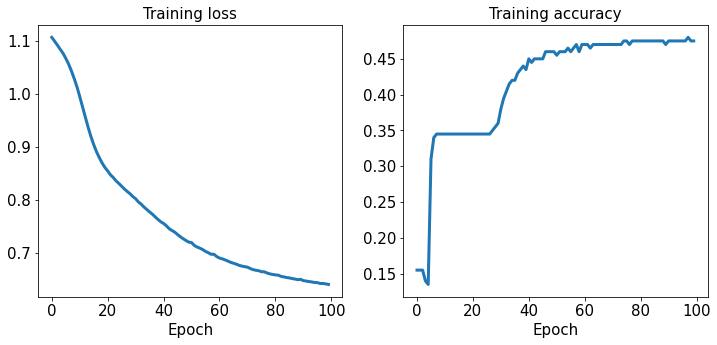

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(1,2,1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both',which='major',labelsize=15)

ax = fig.add_subplot(1,2,2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both',which='major',labelsize=15)
plt.show()

In [6]:
# Save model to path

path = 'iris_classifier.pt'
torch.save(model,path)

In [7]:
model_new = torch.load(path)
model_new.eval()

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

In [8]:
X_test_norm = (X_test - np.mean(X_test))/np.std(X_test)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test)

pred_test = model_new(X_test_norm)
correct = (torch.argmax(pred_test, dim=1) == y_test).float()
 
accuracy = correct.mean()

print(f'Test Acc. : {accuracy:.4f}')

Test Acc. : 0.9800


In [9]:
# Save only params 
path = 'iris_classifier_state.pt'
torch.save(model.state_dict(), path)

model_new = Model(input_size, hidden_size, output_size)
model_new.load_state_dict(torch.load(path))

<All keys matched successfully>

### Implementing using nn.sequential

In [11]:
model = nn.Sequential (
nn.Linear(4,16),
nn.ReLU(),
nn.Linear(16,32),
nn.ReLU()
)

model

Sequential(
  (0): Linear(in_features=4, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=32, bias=True)
  (3): ReLU()
)

In [13]:
model[1]

ReLU()